In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from tqdm import tqdm


In [10]:
N = 100   
r = np.linspace(0.01,10,N) 
phi = np.linspace(0,np.pi/2,N)
dr = r[1] - r[0]
dphi = phi[1] - phi[0]
lambda_ = dr/dphi
print(lambda_)
print(dr)


6.359831525952138
0.1009090909090909


In [13]:
#Matriz inicial
def InitT(): 
    
    T = np.zeros((N,N))
    
    for j in range(len(phi)):
        T[-1,j] = 100
    for i in range (len(r)):
        T[i,0] = 0  
        T[i,-1] = 0
            
        
    return T

In [14]:
def Iteracion(T,r,phi,Nit = int(1e5) ,tolerancia = 1e-5):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
    
        
        for i in range(1, len(r)-1):
            for j in range(1,len(phi)-1):
                
                
                if j == len(phi) - 1:
                    b = 1
                else:
                    b = j+1
                
                
                c = 2 - dr/r[i] + 2*(lambda_/r[i])**2
                
                tmp = T[i+1,j] + (1-dr/r[i])*T[i-1,j] + ((lambda_/r[i])**2)*(T[i,b] + T[i,j-1])
                tmp /= c
                

                cambio=T[i,j]-tmp
                T[i,j] = tmp
                
        
                if np.abs(cambio) > dmax:
                    dmax = cambio
     
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            
            itmax = it
            break
            
    return T,itmax
        

In [15]:
T = InitT()
Tf1,_ =  Iteracion(T,r,phi)

  2%|▌                                  | 1584/100000 [01:02<1:04:24, 25.47it/s]

1584


<IPython.core.display.Javascript object>


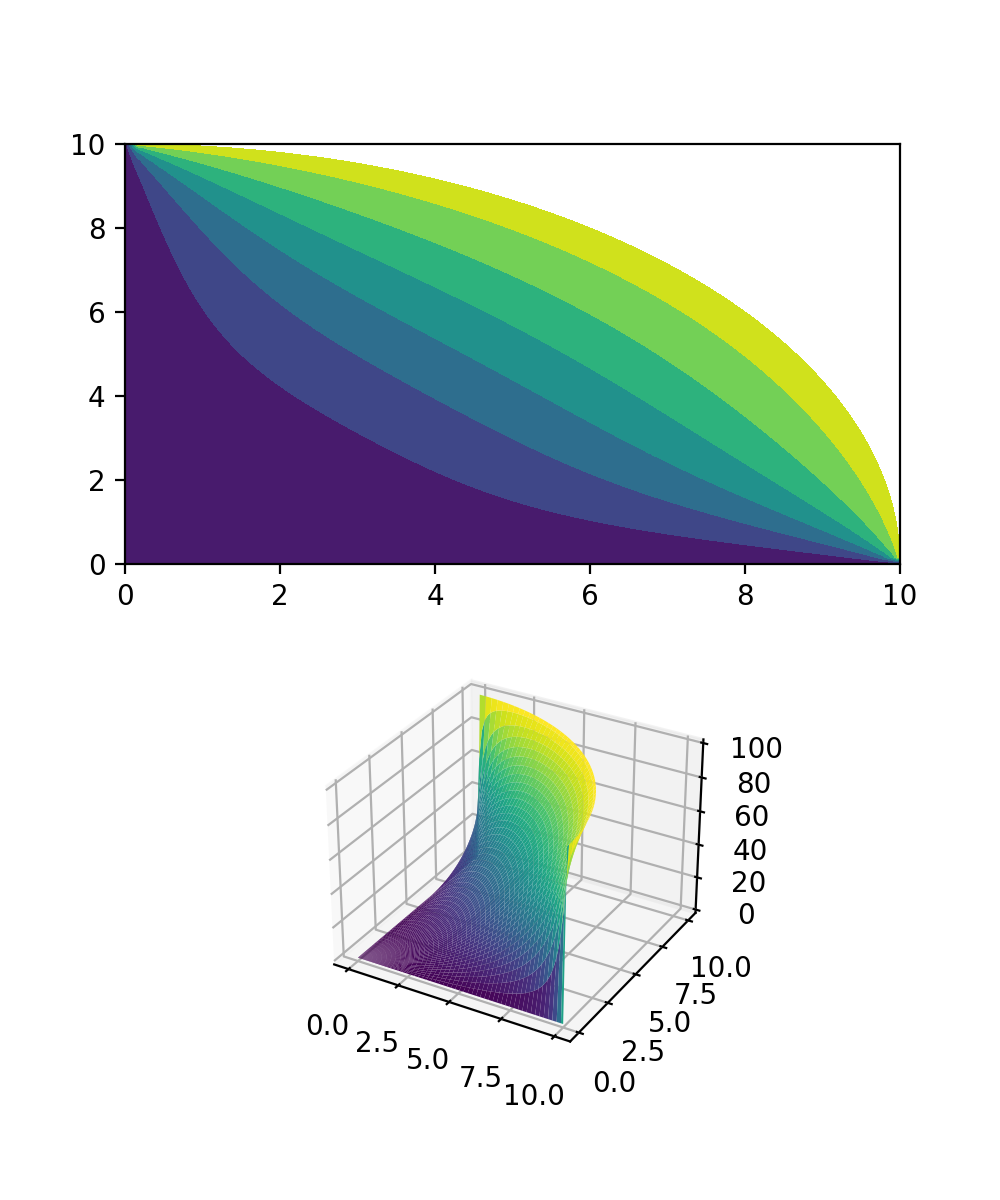

In [16]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212, projection='3d')

R, Phi = np.meshgrid(r,phi)

X,Y = R*np.cos(Phi),R*np.sin(Phi)


c = ax.contourf(X,Y,Vf1.T)

ax1.plot_surface(X,Y,Vf1.T,cmap='viridis')